# Regression

- It's a **Supervised Learning** ML algorithm that is used to predict **continuous values** (y/target) based on features (X/variables)
- It establishes a relationship between an independent variable (X or features) and dependent variable (y or target)
- We have different types of regression algos:
    - Linear
        - Linear Regression
        - Lasso Regression
        - Ridge Regression
    - Linear and Non-Linear
        - Polynomial Regression
        - Support Vector Regressor (Support Vector Machines)
        - Decision Tree Regressor
        - and more
- For **Linear Regression**, we have 2 main categories:
    1. Simple Linear Regression
        - One independent variable (X) and one dependent variable (y)
        - Equation: $y = B_0 + B_1X$  similar to the equation of a line $y = mx + c$ (m: slope [rate of change/rise/run] and c: y-intercept [where the line crosses the y-axis])
    2. Multiple-Linear Regression:
        - Multiple independent variable (X1,X2,X3,...,Xn) and one dependent variable (y)
        - Equation: $y = B_0 + B_1X_1 + B_2X_2 + B_3X_3 + ... B_nX_n$ (we have multiple slope values and one y-intercept)

![linreg](https://miro.medium.com/v2/resize:fit:800/0*_RYGlkVN4U-zzMXH.png)

## Linear Regression

In [65]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [66]:
cal_housing = fetch_california_housing()
cal_housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [67]:
cal_housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [68]:
# get the data dictionary
print(cal_housing['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [69]:
df = pd.DataFrame(cal_housing['data'], columns=cal_housing['feature_names'])
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

In [70]:
# add the target
df['MedHouseVal'] = cal_housing['target']
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

In [71]:
# alternative method - easier
#cal_housing = fetch_california_housing(as_frame=True)
#df = cal_housing.frame

In [72]:
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [73]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [74]:
df.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

<Axes: xlabel='AveOccup'>

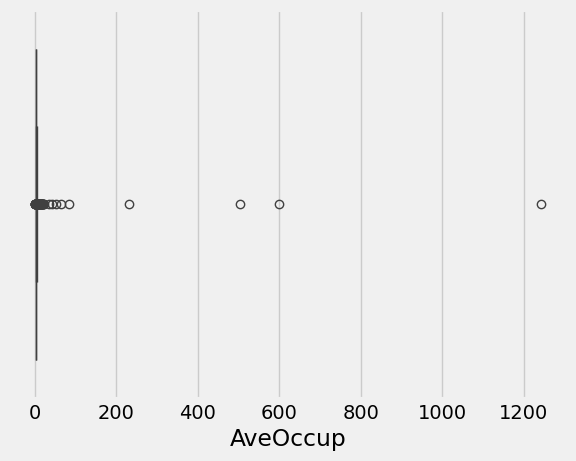

In [75]:
sns.boxplot(x=df['AveOccup'])

<Axes: xlabel='AveOccup', ylabel='Count'>

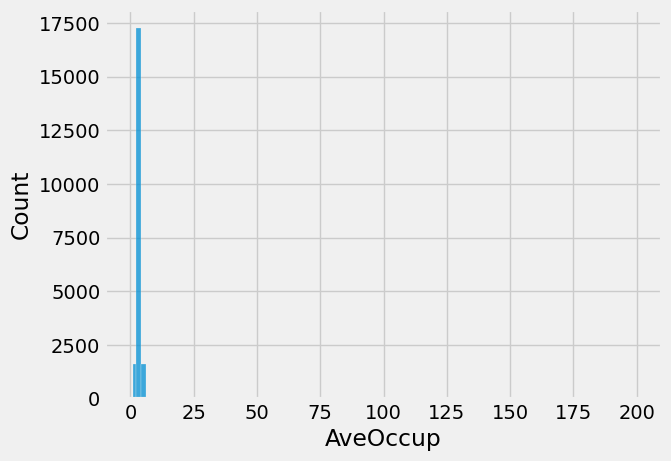

In [76]:
sns.histplot(df['AveOccup'], bins=[0,1,2,4,6,10,20,200])

> Let's filter out the outliers

In [77]:
AveOccup_ul = df['AveOccup'].quantile(0.95) #upper limit
AveOccup_ll = df['AveOccup'].quantile(0.05) #lower limit
print('upper limit:',AveOccup_ul, 'lower limit:',AveOccup_ll)

upper limit: 4.333416666666666 lower limit: 1.872544757033248


In [78]:
outlier_filter = (df['AveOccup'] < AveOccup_ul) & (df['AveOccup'] > AveOccup_ll)

In [79]:
df_org = df.copy()

In [80]:
df = df[outlier_filter]

<Axes: xlabel='AveOccup'>

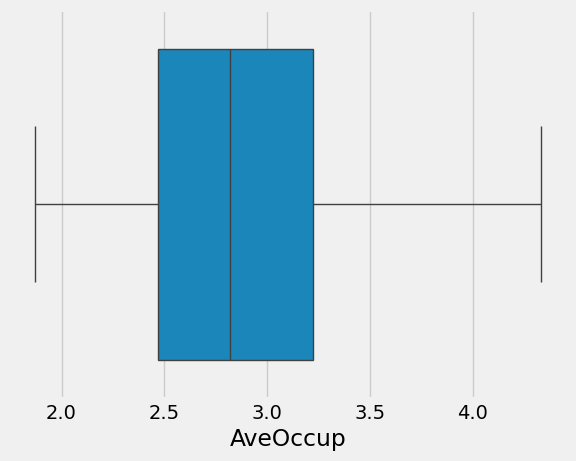

In [81]:
sns.boxplot(x=df['AveOccup'])

In [82]:
print(f'Shape Before: {df_org.shape} | Shape After: {df.shape}')

Shape Before: (20640, 9) | Shape After: (18576, 9)


> Part of EDA is to check the quality of the data, therefore, we can validate that all data points fall into the map of California 

Text(0, 0.5, 'Latitude')

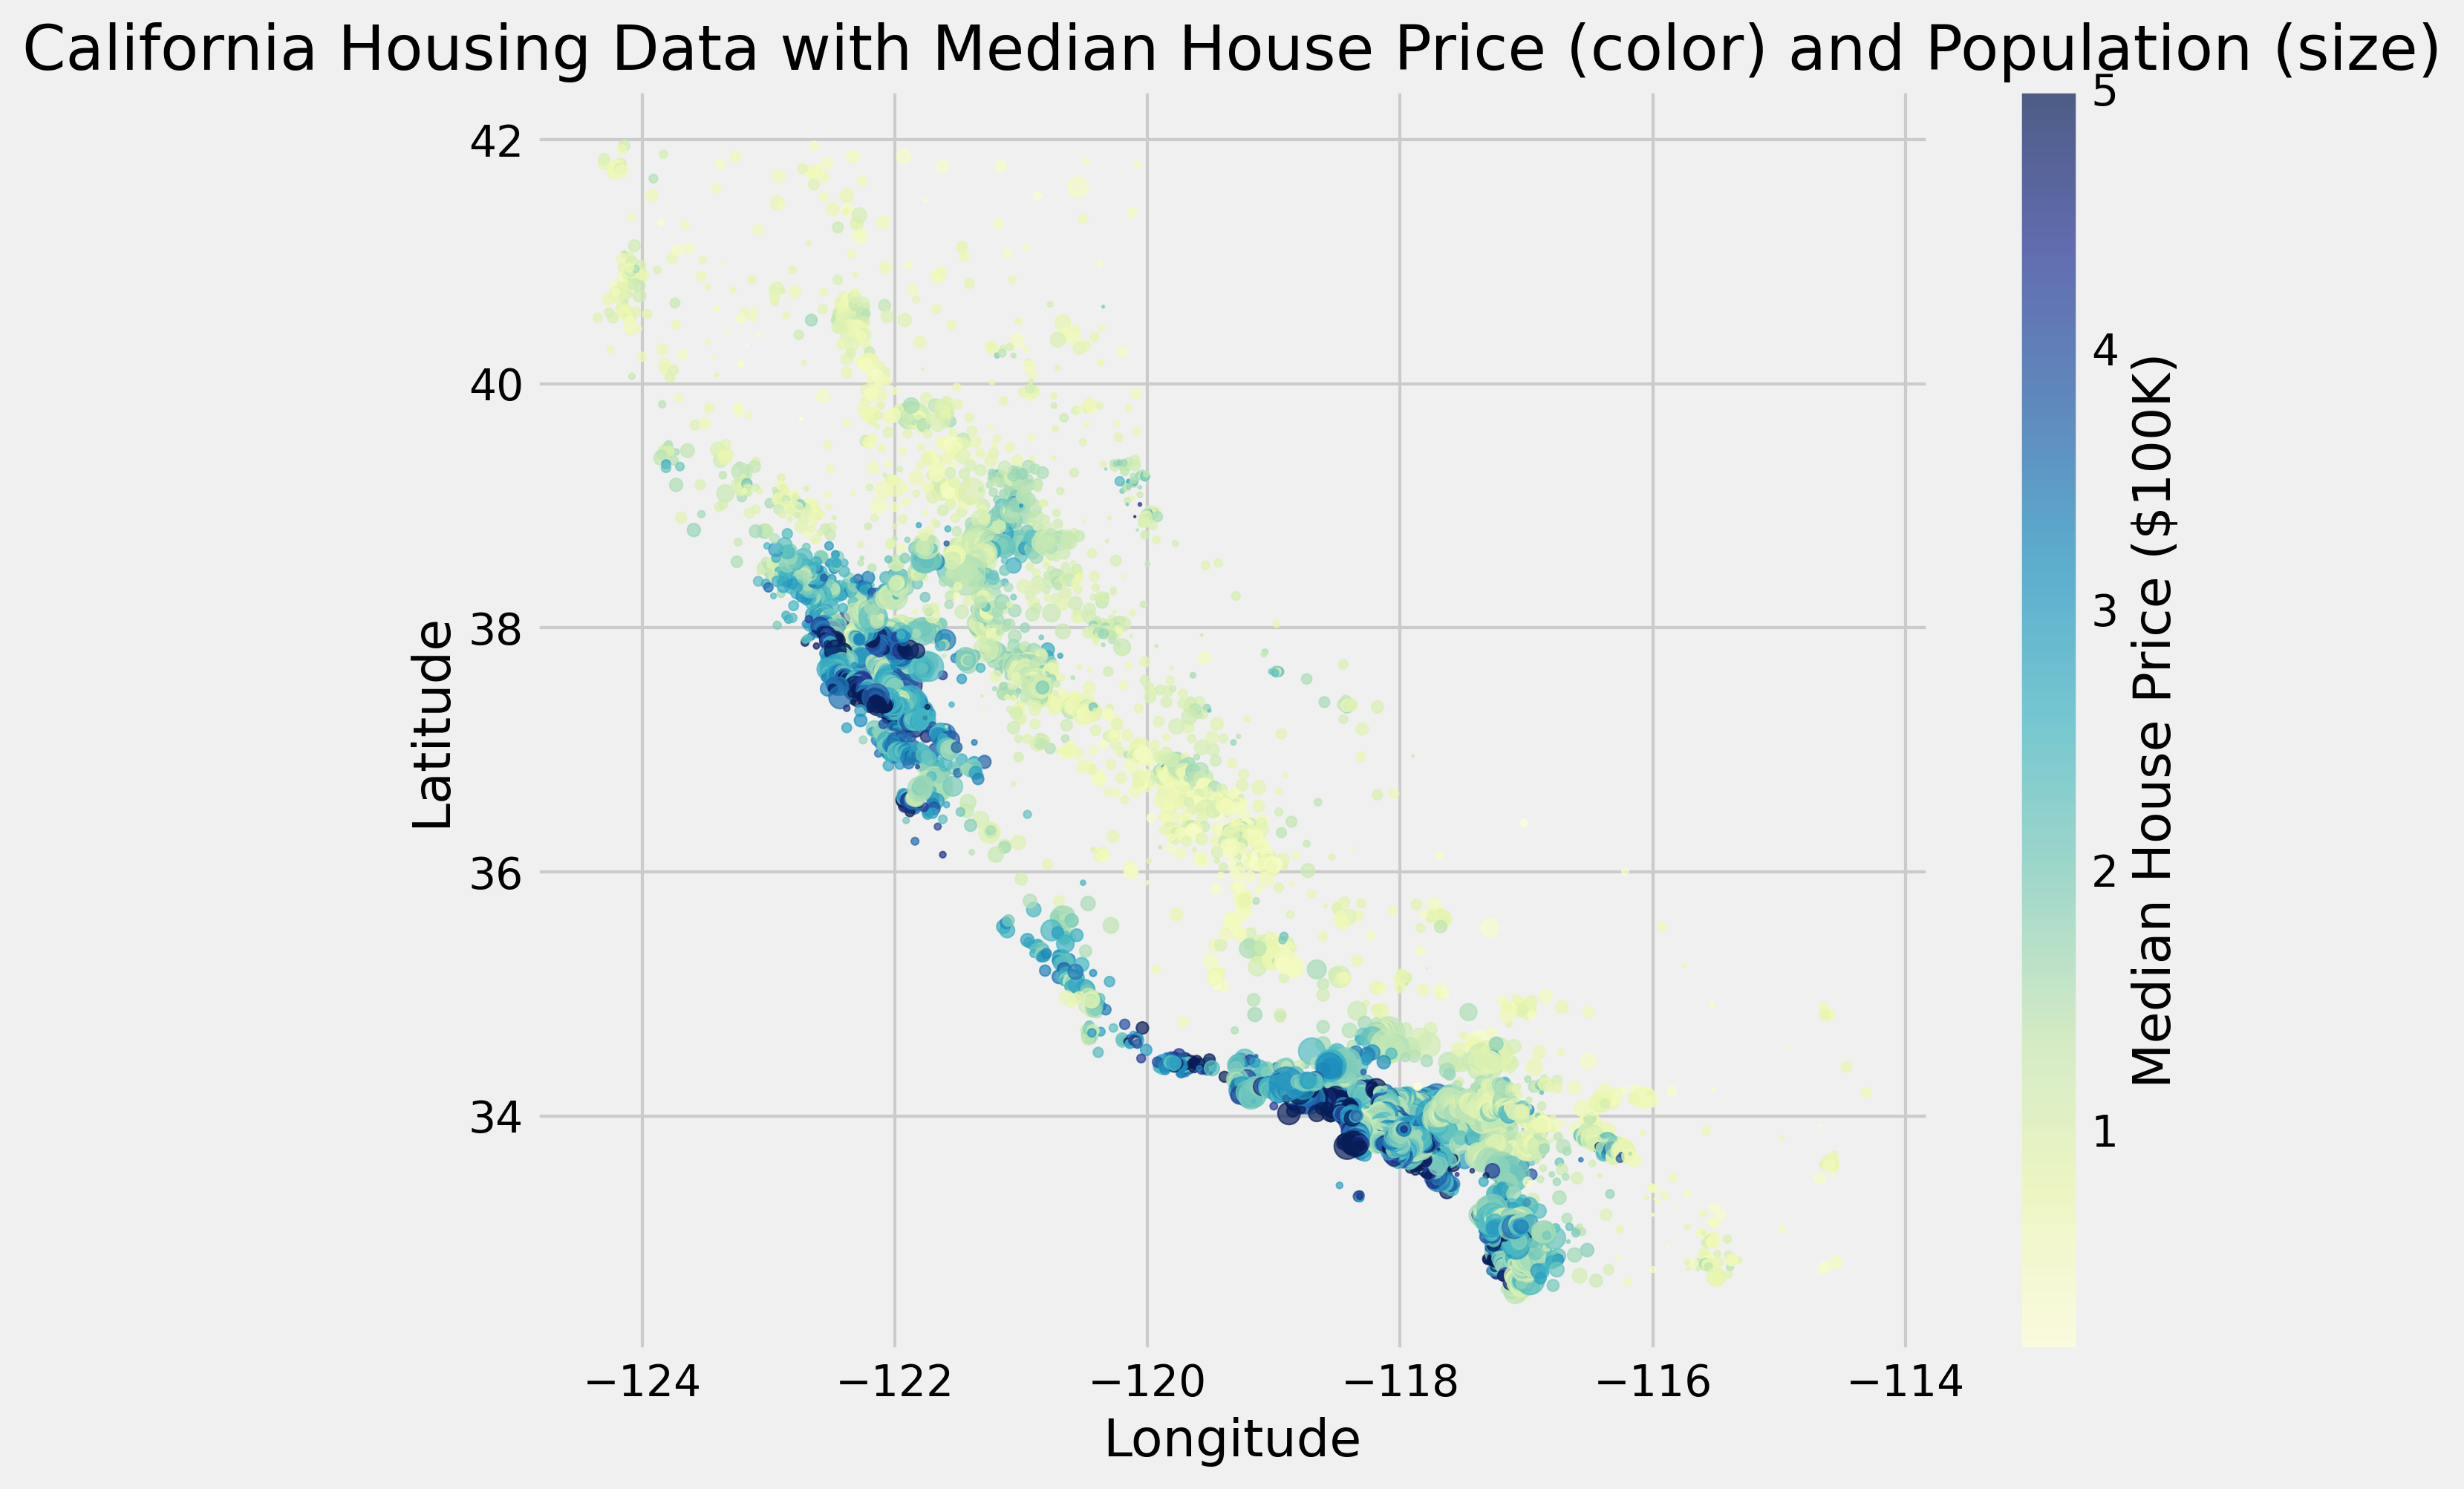

In [83]:
plt.figure(figsize=(9,7), dpi=300)

plt.scatter(x=df['Longitude'], y=df['Latitude'], c=df['MedHouseVal'], s=df['Population']/100, alpha=.7, cmap='YlGnBu')
plt.colorbar(label='Median House Price ($100K)')
plt.title('California Housing Data with Median House Price (color) and Population (size)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [84]:
df['Longitude'].min()

-124.35

In [85]:
fig = go.Figure(go.Scattermapbox(
    lat=df['Latitude'],
    lon=df['Longitude'],
    mode='markers',
    hoverinfo='text',
    hovertext=df.apply(lambda row: f"Median House Price: ${row['MedHouseVal']:.2f}<br>Median Income: ${row['MedInc']:.2f}<br>Median Age: {row['HouseAge']:.2f}<br>Ave Rooms: {row['AveRooms']:.2f}<br>Ave Bedrooms: {row['AveBedrms']:.2f}<br>Population: {row['Population']:,.2f}<br>Ave Occupancy: {row['AveOccup']:.2f}", axis=1),
    marker=go.scattermapbox.Marker(
        color=df['MedHouseVal'],
        colorscale='inferno',
        size=df['Population']/300,
        colorbar=dict(
            title='Median House Price'
        )
    )
))

# Update the layout to display a map
fig.update_layout(
    mapbox_style="carto-positron",
    mapbox_zoom=6,
    mapbox_center_lat=37.7749,  # California's latitude
    mapbox_center_lon=-122.4194,  # California's longitude
    margin={"r": 0, "t": 0, "l": 0, "b": 0}
)

# Show the plot
fig.show()

## Evaluating The Linearity of A Regression Model

- Technically, we can jump straight into building the linear regression model using `sklearn`. However, if the dataset is complex with a large number of features, it's always recommended to evaluate the model's linearity using statistical methods, such as `statsmodels`.
- `statsmodels.api` can be used to perform various statistical evaluations, such building a linear model that explains how good of a fit the model is. Plus, getting coefficients.
- Steps:
    1. Define X and y
    2. Add an arbitrary constant $B_0$, which will be adjusted later after fitting the model.
    3. Deploy the liner regression model as OLS (Ordinary Least Squares)
    4. Get the OLS summary
    5. Check for Multicollinearity - modify the data if it exists
    6. Repeat steps 3 and 4 to get a better outcome in the summary

In [86]:
# step 1 
X = df.drop(columns='MedHouseVal', axis=1)
y = df['MedHouseVal']

`pip install statsmodels`

In [87]:
import statsmodels.api as sm

In [88]:
# step 2
X_constant = sm.add_constant(X)
X_constant.head()

const  MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
0    1.0  8.3252      41.0  6.984127   1.023810       322.0  2.555556   
1    1.0  8.3014      21.0  6.238137   0.971880      2401.0  2.109842   
2    1.0  7.2574      52.0  8.288136   1.073446       496.0  2.802260   
3    1.0  5.6431      52.0  5.817352   1.073059       558.0  2.547945   
4    1.0  3.8462      52.0  6.281853   1.081081       565.0  2.181467   

   Latitude  Longitude  
0     37.88    -122.23  
1     37.86    -122.22  
2     37.85    -122.24  
3     37.85    -122.25  
4     37.85    -122.25

In [89]:
X_constant['const'].mean()

1.0

In [90]:
#step 3 
ols_model = sm.OLS(y, X_constant).fit()

In [91]:
#step 4
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedHouseVal   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     5063.
Date:                Wed, 05 Feb 2025   Prob (F-statistic):               0.00
Time:                        21:15:43   Log-Likelihood:                -18020.
No. Observations:               18576   AIC:                         3.606e+04
Df Residuals:                   18567   BIC:                         3.613e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -33.6608      0.605    -55.662      0.000     -34.846     -32.475
MedInc         0.3962      0.004     99.241      0.000       0.388       0.404
HouseAge       0.0095      0.000     22.640      0.000       0.009       0.010
AveRooms      -0.0337      0.006     -5.840      0.000      -0.045      -0.022
AveBedrms      0.2855      0.028     10.202      0.000       0.231       0.340
Population  3.847e-05   4.72e-06      8.142      0.000    2.92e-05    4.77e-05
AveOccup      -0.4565      0.009    -51.131      0.000      -0.474      -0.439
Latitude      -0.4367      0.007    -66.286      0.000      -0.450      -0.424
Longitude     -0.4231      0.007    -61.399      0.000      -0.437      -0.410
==============================================================================
Omnibus:                     3195.471   Durbin-Watson:                   0.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9778.373
Skew:                           0.894   Prob(JB):                         0.00
Kurtosis:                       6.072   Cond. No.                     2.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- R-Squared: Measures the proportion of variance in the dependent variables explained by the features (independent variables)
    - Always a range from 0 to 1
    - We're looking for 0.75 and above to say the linear regression is a good fit
- Adjusted R-Squared: Similar to R-Squared by with generalization to reduce overfitting.
- coef: the values that represent the change in the dependent variable for a one-unit change in the independent variable. For example: If MedInc goes up by 1 unit, MedHouseVal will go up by 0.3962. 
    - These coefficients can represent the model's linear equation. $y = B_0 + B_1X_1 + B_2X_2 + B_3X_3 + ... B_nX_n$
    - Negative coefficient indicates a negative relationship.
- p-value: Statistical significance of the coefficients. If p-value <=0.05 then, we reject the null hypothesis. The relationship is unlikely to occur by chance.
    - having a very low p-value is a good thing for the coefficient.



Methods to improve the R-squared and coefficient values:
- Better feature engineering and data cleansing
- Reducing Multicollinearity 

## Multicollinearity

- It's a scenario where 2 or more **independent** variables (features) in a regression model that are **highly correlated** with each other.
- It can cause problems in estimating the coefficients when the objective of the problem is to derive the coefficients.
- Therefore, consider addressing multicollinearity to improve the model's coefficient estimate and overall realistic evaluation.
- After removing multicollinearity, you may get a lower R-Squared value. That's because the previous value was inflated.
- Addressing Multicollinearity:
    - Correlation Matrix: independent variables should not have correlation higher than .6 or .65
    - Analyzing the VIF (Variance Inflation Factor)


In [92]:
corr_matrix = X.corr()
corr_matrix

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.120380  0.328765  -0.066264    0.008735 -0.045062   
HouseAge   -0.120380  1.000000 -0.153435  -0.078262   -0.326029 -0.039926   
AveRooms    0.328765 -0.153435  1.000000   0.850121   -0.075642 -0.054030   
AveBedrms  -0.066264 -0.078262  0.850121   1.000000   -0.065278 -0.078353   
Population  0.008735 -0.326029 -0.075642  -0.065278    1.000000  0.164420   
AveOccup   -0.045062 -0.039926 -0.054030  -0.078353    0.164420  1.000000   
Latitude   -0.101075  0.010973  0.096105   0.069106   -0.115525 -0.178983   
Longitude  -0.000395 -0.111716 -0.021183   0.015685    0.105958  0.179666   

            Latitude  Longitude  
MedInc     -0.101075  -0.000395  
HouseAge    0.010973  -0.111716  
AveRooms    0.096105  -0.021183  
AveBedrms   0.069106   0.015685  
Population -0.115525   0.105958  
AveOccup   -0.178983   0.179666  
Latitude    1.000000  -0.922650  
Longitude  -0.922650   1.000000

<Axes: >

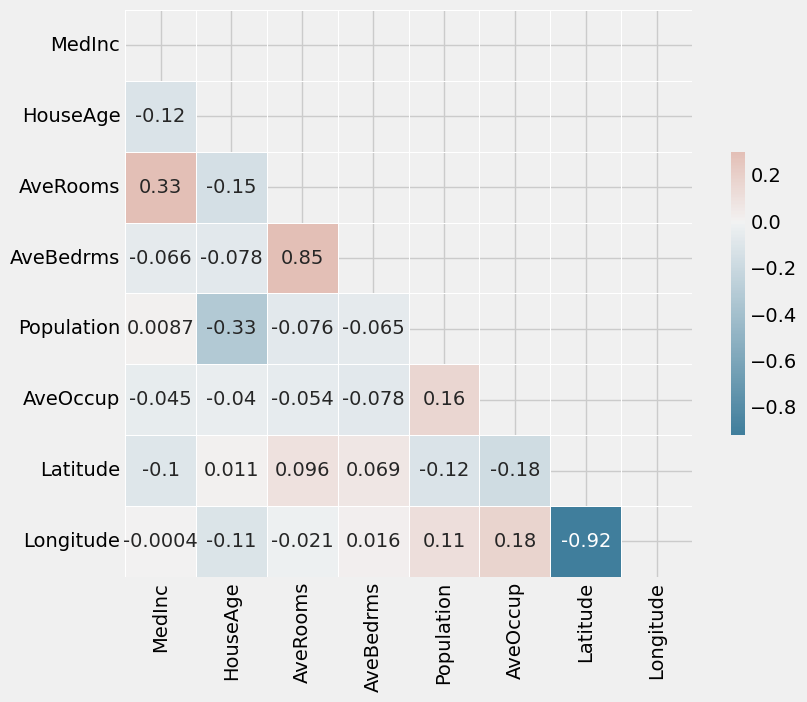

In [93]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)



sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

- AveRooms, AveBedrooms have strong positive correlation, while lat and long have strong negative correlation.
- We can drop one of the highly correlated features

### VIF Analysis
- Variance Inflation Factor (also inflation of coefficient variance)
- It's a measure used for regression analysis and assessing multicollinearity (for independent variables)
- After calculating VIF, we can inspect the proportions across features. Then, drop the highest 2 or 3
    - VIF = 1 -> there's no multicollinearity
    - VIF > 5 there's acceptable level of multicollinearity
    - VIF > 10 -> high multicollinearity

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [95]:
vif_report = pd.DataFrame(X.columns, columns=['FeatureName'])
vif_report

FeatureName
0      MedInc
1    HouseAge
2    AveRooms
3   AveBedrms
4  Population
5    AveOccup
6    Latitude
7   Longitude

In [96]:
vif_report['VIF'] = [variance_inflation_factor(X.values, col) for col in range(len(X.columns))]

In [97]:
vif_report

FeatureName         VIF
0      MedInc   12.777122
1    HouseAge    7.294098
2    AveRooms   53.296041
3   AveBedrms   49.706183
4  Population    3.227969
5    AveOccup   30.999512
6    Latitude  599.029312
7   Longitude  789.743000

In [98]:
vif_report.sort_values(by='VIF', ascending=False).reset_index()

index FeatureName         VIF
0      7   Longitude  789.743000
1      6    Latitude  599.029312
2      2    AveRooms   53.296041
3      3   AveBedrms   49.706183
4      5    AveOccup   30.999512
5      0      MedInc   12.777122
6      1    HouseAge    7.294098
7      4  Population    3.227969

> It's recommended to use both correlation and VIF methods to confirm your answer of what columns need to be dropped

In [99]:
X_low_vif = X.drop(columns=['Longitude', 'AveRooms'], axis=1)

In [100]:
X_constant_low_vif = sm.add_constant(X_low_vif)
ols_model = sm.OLS(y, X_constant_low_vif).fit()

In [101]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedHouseVal   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     4923.
Date:                Wed, 05 Feb 2025   Prob (F-statistic):               0.00
Time:                        21:15:44   Log-Likelihood:                -19928.
No. Observations:               18576   AIC:                         3.987e+04
Df Residuals:                   18569   BIC:                         3.992e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5908      0.103     35.031      0.000       3.390       3.792
MedInc         0.4259      0.003    155.044      0.000       0.420       0.431
HouseAge       0.0181      0.000     40.783      0.000       0.017       0.019
AveBedrms      0.0159      0.011      1.392      0.164      -0.006       0.038
Population  7.224e-05   5.19e-06     13.915      0.000    6.21e-05    8.24e-05
AveOccup      -0.4851      0.010    -49.522      0.000      -0.504      -0.466
Latitude      -0.0686      0.002    -27.663      0.000      -0.073      -0.064
==============================================================================
Omnibus:                     2730.154   Durbin-Watson:                   0.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6764.944
Skew:                           0.835   Prob(JB):                         0.00
Kurtosis:                       5.440   Cond. No.                     3.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Linear vs Polynomial Regression

![p](https://miro.medium.com/v2/resize:fit:1200/1*9x_5VZjJ1b5LhVvm5xRSRw.jpeg)

In [129]:
path = '/Users/bassel_instructor/Documents/Datasets/'

df = pd.read_csv(path+'position_salaries.csv')
df.head()

Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000

Let's deploy a simple linear regression.

In [130]:
X = df[['Level']]
y = df[['Salary']]

In [131]:
plt.style.use('fivethirtyeight')

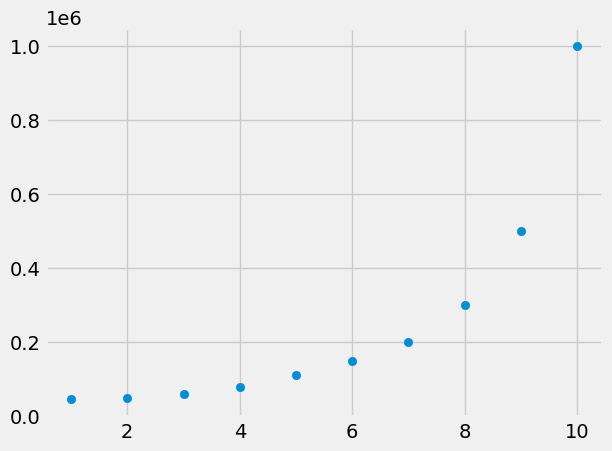

In [132]:
plt.scatter(X, y)

In [133]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [134]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

In [135]:
lr_model.fit(X_train, y_train)

LinearRegression()

To use Polynomial Regression in `sklearn` we need to convert our features to Polynomial Features.

In [136]:
from sklearn.preprocessing import PolynomialFeatures

pol_feat = PolynomialFeatures(degree=4) # degree is a hyperparamter 

![p](https://miro.medium.com/v2/resize:fit:1400/1*YDnuvD8M4kmkYHyth5mELA.jpeg)

In [137]:
X_train_pol = pol_feat.fit_transform(X_train)

In [138]:
pr_model = LinearRegression()

pr_model.fit(X_train_pol, y_train)

LinearRegression()

Now we can derive the fitted line from both models and compare visually.

In [139]:
lr_fitted_line = lr_model.predict(X)
pr_fitted_line = pr_model.predict(pol_feat.fit_transform(X))

Text(0.5, 1.0, 'Polynomial Regression Solution')

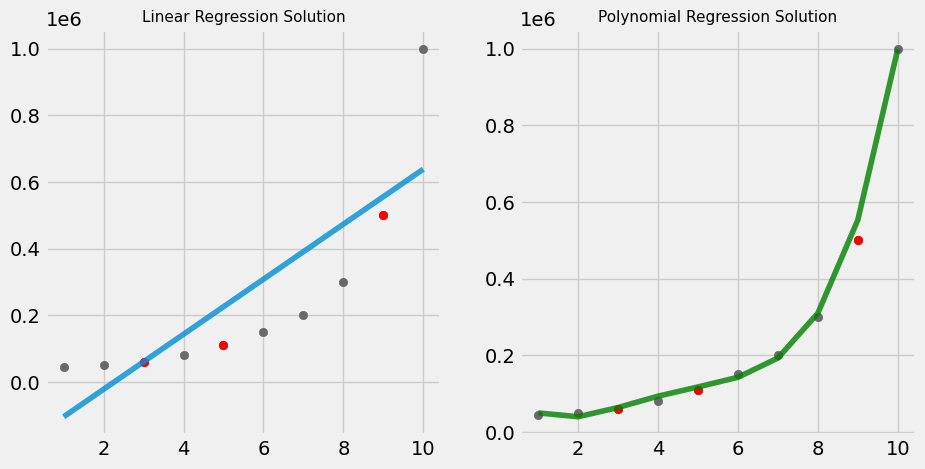

In [140]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10,5))

axs[0].scatter(X, y, color='dimgray')
axs[0].scatter(X_test, y_test, color='red')
axs[0].plot(X, lr_fitted_line, alpha=0.8)
axs[0].set_title('Linear Regression Solution', fontsize=11)


axs[1].scatter(X, y, color='dimgray')
axs[1].scatter(X_test, y_test, color='red')
axs[1].plot(X, pr_fitted_line, alpha=0.8, color='green')
axs[1].set_title('Polynomial Regression Solution', fontsize=11)